In [1]:
from colorsys import hls_to_rgb

import jax as jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from jax.numpy import pi

import chromatix.functional as cx

In [2]:
# CC nadapez: from https://stackoverflow.com/a/20958684
# def colorize(field, normalize=True, gamma=0.3):
#     z = field.u[0,:,:,0,0]
def colorize(arr, normalize=True, gamma=0.3):
    z = arr
    r = np.abs(z)
    if normalize:
        r = r / np.max(r)

    arg = np.angle(z) 

    h = (arg + pi)  / (2 * pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**gamma)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    c = c.swapaxes(0,1) 
    return c

## Generate a 3D sample with thin filaments of variing length in random orientations



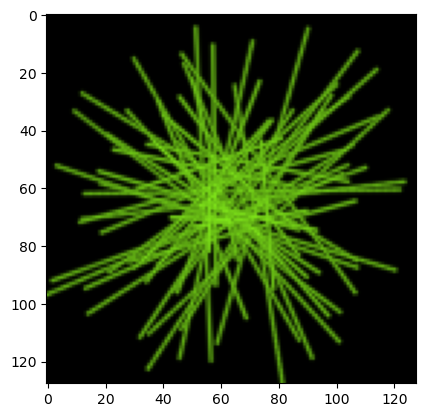

In [6]:
arr = cx.filaments_3d((128, 128, 128), 1, radius=0.9, rand_offset=0.2, num_filaments=50)
arr_p = jnp.sum(arr, axis=1)
plt.imshow(colorize(1j*arr_p))


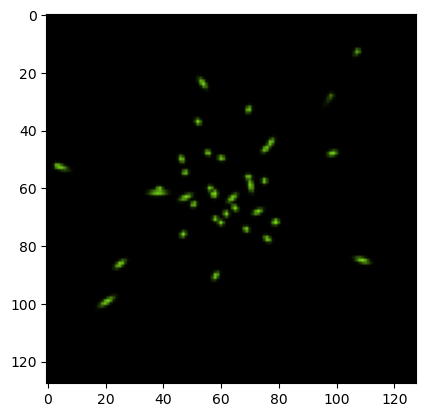

In [5]:
z = 84
plt.imshow(colorize(1j*arr[:,z,:] * (arr[:,z,:] < 15)))
